<a href="https://colab.research.google.com/github/harshil1030/McD_Review_Sentiment_Analysis/blob/main/mcd_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [97]:
data=pd.read_csv('/content/drive/MyDrive/mcdreview.csv',encoding=('ISO-8859-1'))

In [98]:
data.head()

,reviewer_id,store_name,category,rating_count,review_time,review,rating
0,1.0,McDonald's,Fast food restaurant,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2.0,McDonald's,Fast food restaurant,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3.0,McDonald's,Fast food restaurant,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4.0,McDonald's,Fast food restaurant,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5.0,McDonald's,Fast food restaurant,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [99]:
data = data.drop('review_time', axis=1)

In [101]:
data=data.dropna()

In [102]:
data = data.drop('rating_count', axis=1)

In [103]:
data = data.drop('reviewer_id', axis=1)

In [104]:
data

,store_name,category,review,rating
0,McDonald's,Fast food restaurant,Why does it look like someone spit on my food?...,1 star
1,McDonald's,Fast food restaurant,It'd McDonalds. It is what it is as far as the...,4 stars
2,McDonald's,Fast food restaurant,Made a mobile order got to the speaker and che...,1 star
3,McDonald's,Fast food restaurant,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,McDonald's,Fast food restaurant,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...
23206,McDonald's,Fast food restaurant,Food was fresh and hot and actually looked lik...,5 stars
23207,McDonald's,Fast food restaurant,"Had a crispy chicken sandwich which was ok, sm...",2 stars
23208,McDonald's,Fast food restaurant,"Food was fresh, albeit the service was a bit s...",4 stars
23209,McDonald's,Fast food restaurant,Very fast and efficient and the manager was ve...,4 stars


In [105]:
print(data.isnull().sum()) #no null data in the dataset

store_name    0
category      0
review        0
rating        0
dtype: int64


In [106]:
import nltk              # removing unwanted stopword
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
import re
import string
from nltk.corpus import stopwords

def clean(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove special characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)

    # Remove numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove stopwords
    stopword = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split(' ') if word not in stopword)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the clean function to the "review" column of the DataFrame
data["review"] = data["review"].apply(clean)


In [108]:
ratings=data["rating"].value_counts()   #how much people have rated how much
numbers=ratings.index
quantity=ratings.values

import plotly.express as px
figure=px.pie(data,values=quantity,names=numbers,hole=0.5)
figure.show()

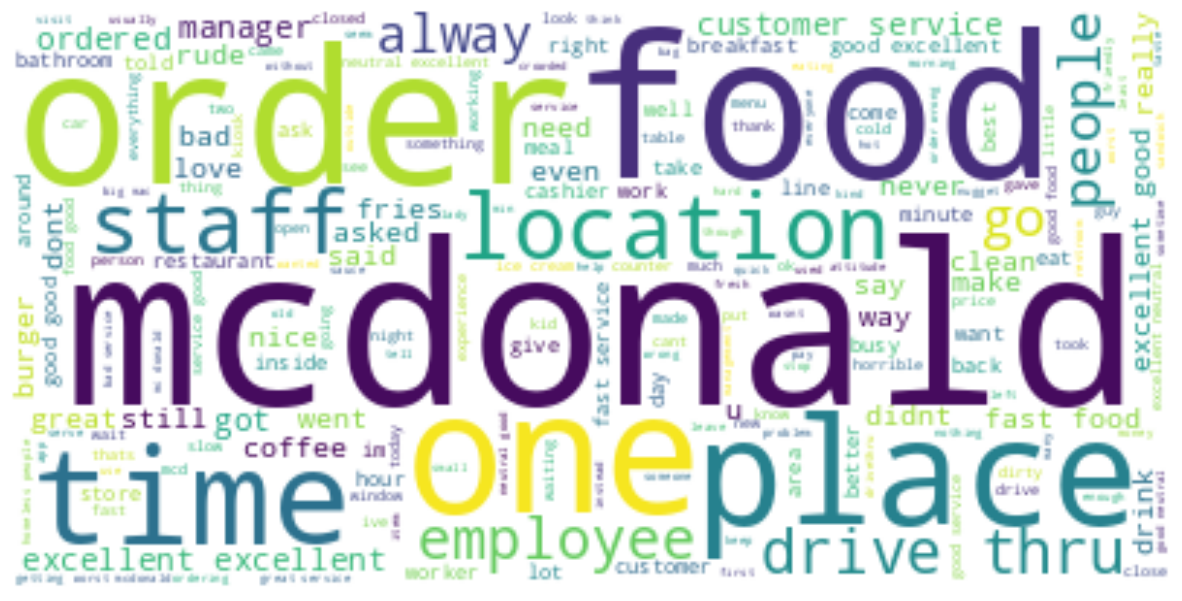

In [109]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Concatenate all review texts into a single string
text = " ".join(i for i in data.review)

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Create the plot
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [110]:
pip install vaderSentiment


In [111]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [115]:
from textblob.en import sentiments
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data=data[["review","Positive","Negative","Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-115-f6ea955d403b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-f6ea955d403b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                              review  Positive  Negative  \
0  look like someone spit food i normal transacti...     0.178     0.045   
1  itd mcdonalds far food atmosphere go staff mak...     0.358     0.000   
2  made mobile order got speaker checked in line ...     0.000     0.098   
3  mc crispy chicken sandwich ï½ï½ï½ï½ï½ï½ï½ï½ï½ï...     0.000     0.000   
4  repeat order times drive thru still manage mes...     0.000     0.200   

   Neutral  
0    0.777  
1    0.642  
2    0.902  
3    1.000  
4    0.800  


<ipython-input-115-f6ea955d403b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
df1=pd.DataFrame(data)
df1

,review,Positive,Negative,Neutral
0,look like someone spit food i normal transacti...,0.178,0.045,0.777
1,itd mcdonalds far food atmosphere go staff mak...,0.358,0.000,0.642
2,made mobile order got speaker checked in line ...,0.000,0.098,0.902
3,mc crispy chicken sandwich ï½ï½ï½ï½ï½ï½ï½ï½ï½ï...,0.000,0.000,1.000
4,repeat order times drive thru still manage mes...,0.000,0.200,0.800
...,...,...,...,...
23206,food fresh hot actually looked like burger def...,0.596,0.000,0.404
23207,crispy chicken sandwich ok small case fries re...,0.167,0.000,0.833
23208,food fresh albeit service bit slow good mcdona...,0.497,0.000,0.503
23209,fast efficient manager friendly despite locati...,0.545,0.000,0.455


In [53]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
    if(a>b) and (a>c):
      print("Positive Reviews")
    elif(b>a) and (b>c):
      print("Negative Reviews")
    else:
      print("Neutral Reviews")
sentiment_score(x,y,z)

Neutral Reviews


In [54]:
print("Total no of Positive Reviews",x)
print("Total no of Negative Reviews",y)
print("Total no of Neutral Reviews",z)

Total no of Positive Reviews 8064.330999999946
Total no of Negative Reviews 2626.9409999999957
Total no of Neutral Reviews 12500.71699999984
